# . Importing  mandatory modules

In [64]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#files for analysis
AgricLandToLAndArea = "AgricLandToLAndArea.csv"
AgricValueAddedToGDP = "AgricValueAddedToGDP.csv"
CO2emission = "CO2emission.csv"
TotalPopulation = "TotalPopulation.csv"
ForestAreaToLAndArea = "ForestAreaToLAndArea.csv"
PopGrowth = "PopGrowth.csv"

In [65]:
def Reading_DataSet(filename):
    
    
    """It will take the name of file and  extracts all West African.After preparing dataset,
    it will return 2 data frames .One will be original data frame  and second one will be its 
    transposed
    
    Parameters:
        filename: Will receive the name of file.
        
    Returns:
        will return 2 data frames.
        [DataFrame, Transposed of orginal data frame]: The original dataframe
        and its transposed version."""
        
    #Importing Agricultural land (% of land area) from Excel Sheet
    columns = [0, 44, 49, 54, 59, 63]
    data = pd.read_csv(f"{filename}", skiprows = 3, usecols = columns)
    data.set_index('Country Name', inplace = True)
    
    #extracting the asian_countries data
    asian_countries = ["Afghanistan", "Pakistan", "India", "Sri Lanka"]
    data = data.loc[asian_countries, :]
     
    
    return data, data.T



# Reading Datasets

In [66]:

#Original and Transposed format for Agriculture Land to Area
agric_asia, agric_asiaTs = Reading_DataSet(AgricLandToLAndArea)

#Original and Transposed format for Agriculture Value Added To GDP
agric_value, agric_value_asiaTs = Reading_DataSet(AgricValueAddedToGDP)
 

#Original and Transposed format for CO2emission
emission_asia, emission_asiaTs = Reading_DataSet(CO2emission)
 

#Original and Transposed format for Total Population
pop_asia, pop_asiaTs = Reading_DataSet(TotalPopulation)
 

#Original and Transposed format for Forest Area To Land
forest_asia, forest_asiaTs = Reading_DataSet(ForestAreaToLAndArea)
 
#Original and Transposed format for Population Growth
growth_asia, growth_asiaTs = Reading_DataSet(PopGrowth)
 

# Defining Functions for Visualization

In [67]:
#Defining the function that plots bar chart for Agric. Land(% of Land Area)
def Plotting_BarChart(data, title):
    
    
    """Plots a grouped bar chart for Asia Countries.

    Args:
        data: A dataframe containing the data to plot.
    """
  
    plt.figure(figsize = (6, 3))
    width = 0.07
    counter = 0
    d = data.copy()
    data_len = len(data.index)
    
    for head_name in d.columns:
        mySeries = d[head_name].squeeze()

        # positioning the Bar elements
        if counter:
            pos = [p + width for p in pos]
        else:
            pos = np.arange(len(d.index))
            
            

        plt.bar(pos, mySeries, width = width, label = head_name)
        
        counter += 1
    plt.xlabel('Country', fontweight = 'bold')
    plt.ylabel('%', fontweight = 'bold')
    plt.legend(bbox_to_anchor = (1.05, 1), title = 'Years')
    plt.title(title, fontweight = 'bold')
    plt.xticks([x + width*2 for x in range(data_len)],
               list(d.index.values), rotation = 90)
    plt.show()

    

In [68]:
def Plotting_LineChart(data, title):
    
    
    """Plots a line chart for Asian Countries.

    Args:
        data: A dataframe containing the data to plot.
    """
    d = data.copy()
    plt.figure(figsize = (6, 4))
    for head_name in d.columns:
        plt.plot(d[head_name], label = head_name)
    plt.xlabel('Years', fontweight = 'bold')
    plt.ylabel('CO2 emissions (kt)', fontweight = 'bold')
    plt.legend(bbox_to_anchor = (1.02, 1), title = 'Country')
    plt.title(title, fontweight = 'bold')  
    plt.show()
    
    

In [69]:
def Plotting_heatmap(data, title):
    
    
    """Plots a correlation heatmap for selected Asian Countries.

    This function calculates the correlation between the columns in the
    given data and plots a heatmap of the correlations.

    Args:
        data: A dataframe containing the data to plot.
        title: The title to use for the plot.
    """
    # Correlation.
    corr = data.corr(method = 'pearson')

    # Create a figure and set the figure size.
    fig, ax = plt.subplots(figsize = (10, 8))

    # Create a heatmap from the correlation matrix.
    sns.heatmap(corr, xticklabels = corr.columns, 
                yticklabels = corr.columns, ax = ax, annot = True)
    ax.set_title(title, fontsize = 18)
    plt.savefig(title + '.png', dpi = 500, bbox_inches = 'tight')
    plt.show()
    
    

# Calling functions for plotting graphs

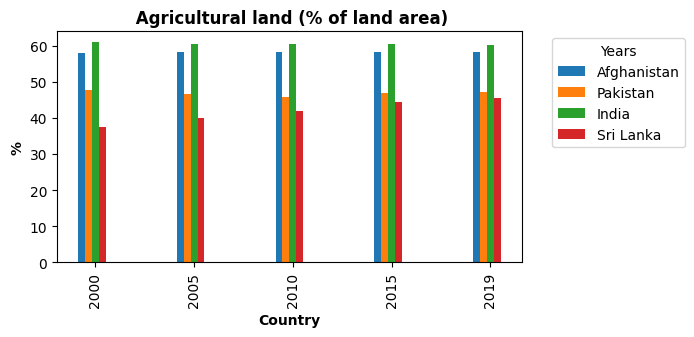

In [70]:
#graphplots for the various indicators used for analysis
Plotting_BarChart(agric_asiaTs, ' Agricultural land (% of land area)')

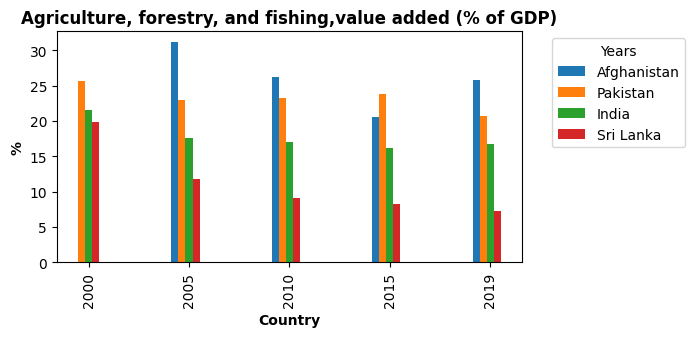

In [71]:
Plotting_BarChart(agric_value_asiaTs, 'Agriculture, forestry, and fishing,value added (% of GDP)')


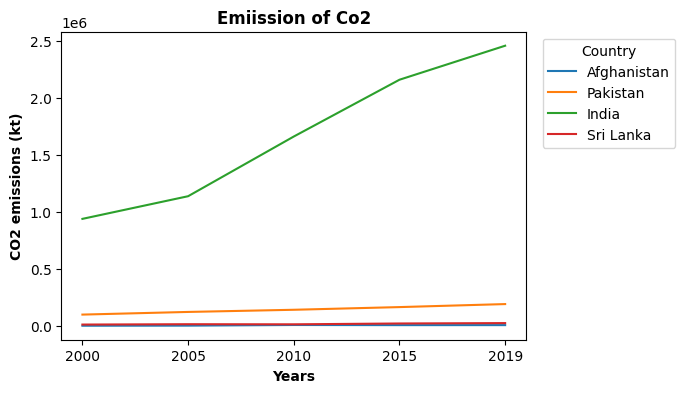

In [72]:
Plotting_LineChart(emission_asiaTs, 'Emiission of Co2')


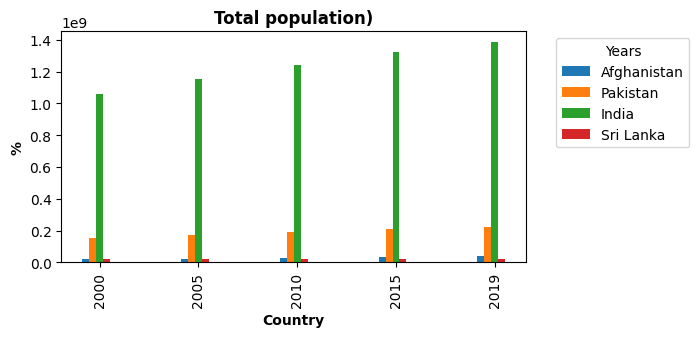

In [73]:
Plotting_BarChart(pop_asiaTs, 'Total population)')


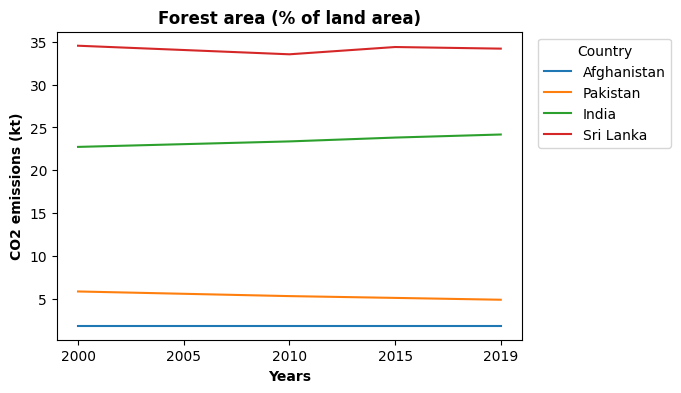

In [74]:
Plotting_LineChart(forest_asiaTs, 'Forest area (% of land area)')


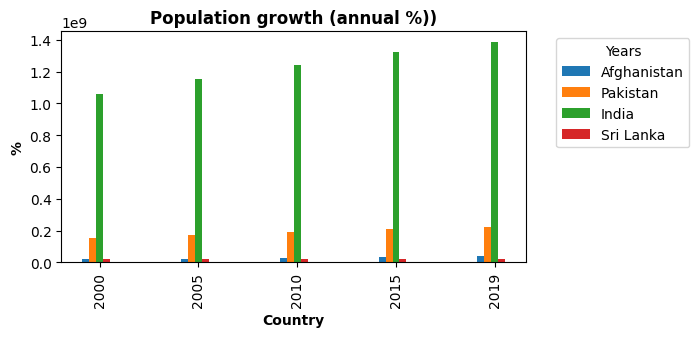

In [75]:
Plotting_BarChart(pop_asiaTs, 'Population growth (annual %))' )


# Doing Statsitical Analysis of each country

# Pakistan

In [76]:
#creating dataset for Pakistan correlation analysis
pak = {'Agric. Land(% of Total Land' : agric_asiaTs['Pakistan'], 
      'Agric.(% of GDP)' : agric_value_asiaTs['Pakistan'], 
      'CO2 emissions (kt)' : emission_asiaTs['Pakistan'],
      'Total Population' :pop_asiaTs['Pakistan'],
      'Forest area (% of land area)' : forest_asiaTs['Pakistan'], 
      'Population growth (annual %)' : growth_asiaTs['Pakistan']}

In [89]:
import seaborn as sns
from scipy.stats.stats import pearsonr


# Correlation of Pakistan

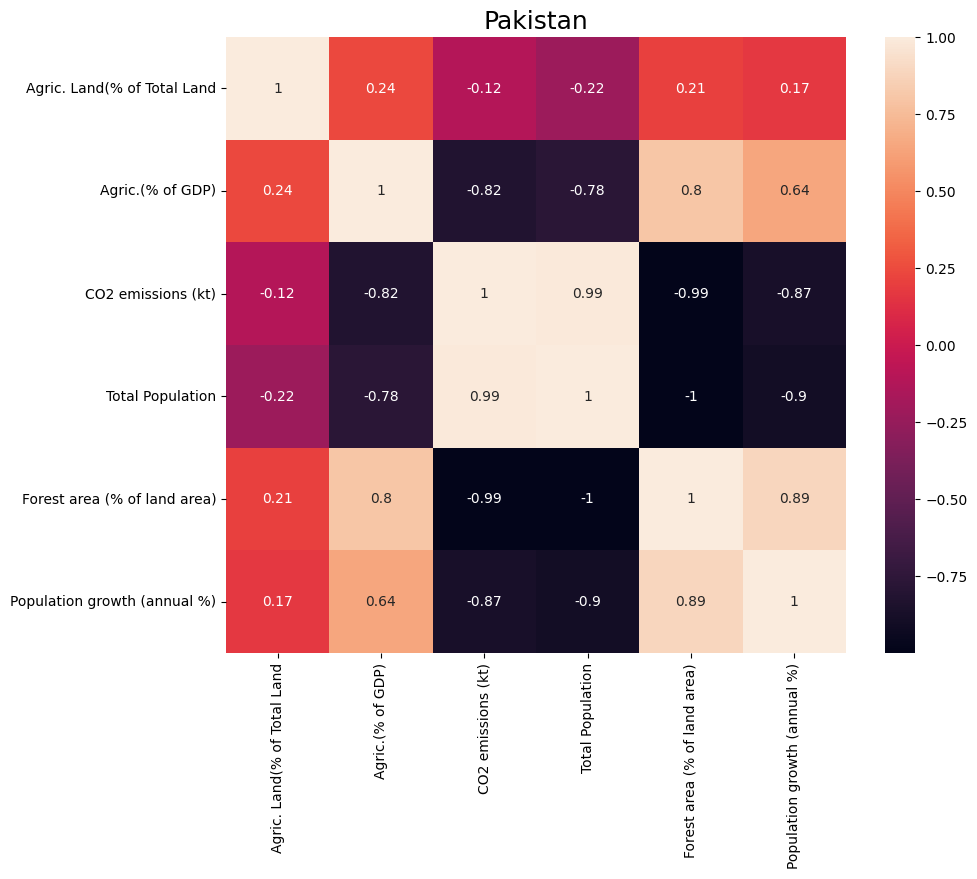

In [77]:
#Converting to dataframe        
df_pak = pd.DataFrame(pak)
 


#plots heatmap for Sierra-Leone
Plotting_heatmap(df_pak, 'Pakistan')

In [78]:
  
x = agric_asiaTs['Pakistan']
y = agric_value_asiaTs['Pakistan']
 
# The P-Value using Scipy to 2d.p   
p = round(pearsonr(x, y)[1], 2)
print('\n P-Value: \n', p)



 P-Value: 
 0.7


# Afghanistan

In [79]:
#creating dataset for Afghanistan correlation analysis
afg = {'Agric. Land(% of Total Land' : agric_asiaTs['Afghanistan'], 
      'Agric.(% of GDP)' : agric_value_asiaTs['Afghanistan'], 
      'CO2 emissions (kt)' : emission_asiaTs['Afghanistan'],
      'Total Population' :pop_asiaTs['Afghanistan'],
      'Forest area (% of land area)' : forest_asiaTs['Afghanistan'], 
      'Population growth (annual %)' : growth_asiaTs['Afghanistan']}

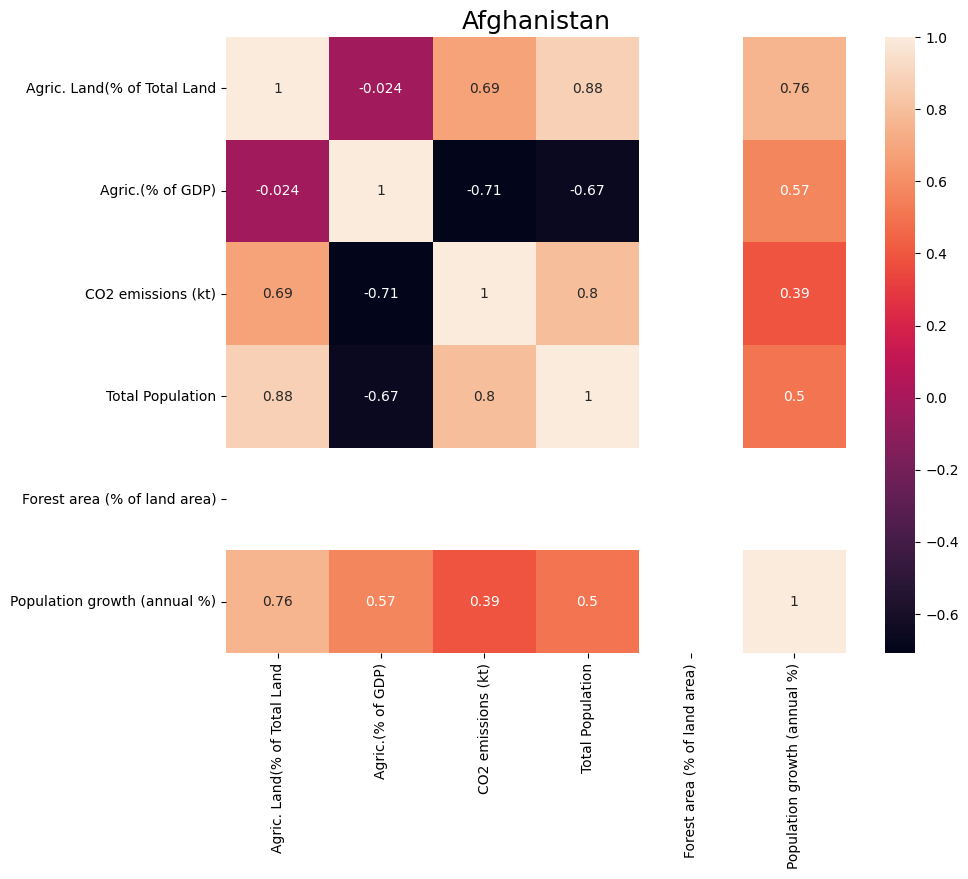

In [80]:
#Converting to dataframe        
df_afg = pd.DataFrame(afg)
 


#plots heatmap for Sierra-Leone
Plotting_heatmap(df_afg, 'Afghanistan')

In [81]:
  
x = agric_asiaTs['Afghanistan'].values[1:]
y = agric_value_asiaTs['Afghanistan'].dropna()

# The P-Value using Scipy to 2d.p   
p = round(pearsonr(x, y)[1], 2)
print('\n P-Value: \n', p)



 P-Value: 
 0.98


# India

In [82]:
#creating dataset for India correlation analysis
ind = {'Agric. Land(% of Total Land': agric_asiaTs['India'], 
      'Agric.(% of GDP)' : agric_value_asiaTs['India'], 
      'CO2 emissions (kt)' : emission_asiaTs['India'],
      'Total Population' : pop_asiaTs['India'],
      'Forest area (% of land area)' : forest_asiaTs['India'], 
      'Population growth (annual %)' : growth_asiaTs['India']}

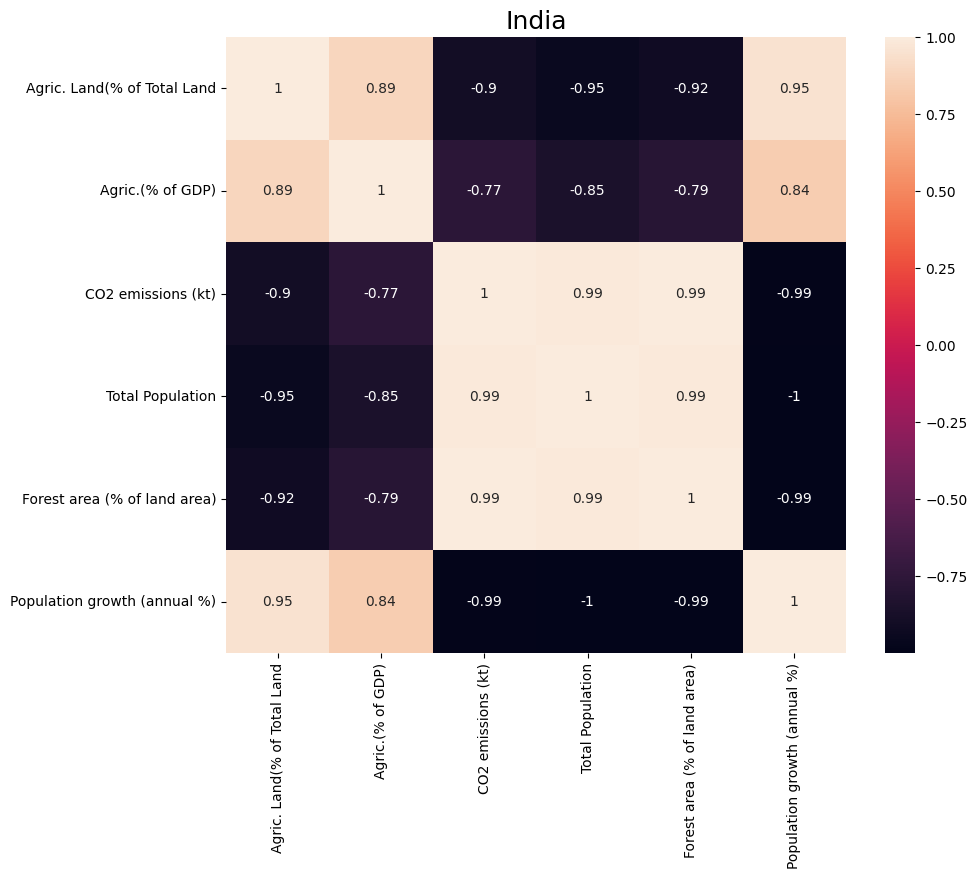

In [83]:
#Converting to dataframe        
df_ind = pd.DataFrame(ind)
 

#plots heatmap for  India
Plotting_heatmap(df_ind, 'India')

In [84]:
  
x = agric_asiaTs['India']
y = agric_value_asiaTs['India']

# The P-Value using Scipy to 2d.p   
p = round(pearsonr(x, y)[1], 2)
print('\n P-Value: \n', p)


 P-Value: 
 0.04


# Sri Lanka

In [85]:
#creating dataset for Pakistan correlation analysis
sl = {'Agric. Land(% of Total Land': agric_asiaTs['Sri Lanka'], 
      'Agric.(% of GDP)' : agric_value_asiaTs['Sri Lanka'], 
      'CO2 emissions (kt)' : emission_asiaTs['Sri Lanka'],
      'Total Population' : pop_asiaTs['Sri Lanka'],
      'Forest area (% of land area)' : forest_asiaTs['Sri Lanka'], 
      'Population growth (annual %)' : growth_asiaTs['Sri Lanka']}

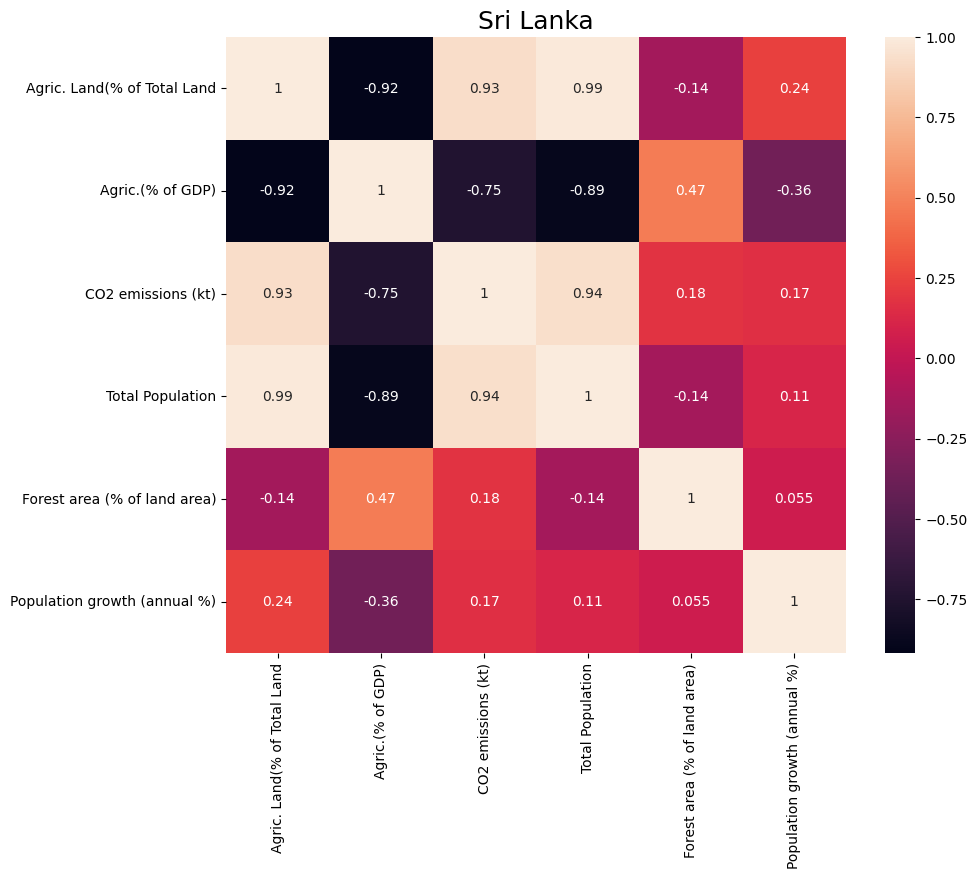

In [86]:
#Converting to dataframe        
df_sl= pd.DataFrame(sl)
 


#plots heatmap for Sri Lanka
Plotting_heatmap(df_sl, 'Sri Lanka')

In [87]:

x = agric_asiaTs['Sri Lanka']
y = agric_value_asiaTs['Sri Lanka']
 
# The P-Value using Scipy to 2d.p   
p = round(pearsonr(x, y)[1], 2)
print('\n P-Value: \n', p)



 P-Value: 
 0.03
